## Trying to train a deep Neural Network to predict the value of a binary number modulo 10

Load the relevant libraries:

In [2]:
import tensorflow as tf 
from tensorflow import keras
import numpy as np
from tensorflow.keras.layers import Dense

print("Tensor flow version:", tf.__version__)

Tensor flow version: 2.8.2


Set up a sequential model

In [4]:
model = tf.keras.models.Sequential()
input_length = 30
model_shape = [512] * 40

model.add(keras.layers.Flatten(input_shape = (input_length,)))

for l in range(len(model_shape)):
  model.add(keras.layers.BatchNormalization()),
  model.add(Dense(model_shape[l], activation = "elu", kernel_initializer = "he_normal"))
  if l+3 >= len(model_shape):
      model.add(tf.keras.layers.Dropout(0.1)),

model.add(Dense(10, activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 30)                0         
                                                                 
 batch_normalization_10 (Bat  (None, 30)               120       
 chNormalization)                                                
                                                                 
 dense_11 (Dense)            (None, 512)               15872     
                                                                 
 batch_normalization_11 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 dense_12 (Dense)            (None, 512)               262656    
                                                                 
 batch_normalization_12 (Bat  (None, 512)             

Define some functions to prepare the data:

In [5]:
def to_binary(n, digits):
  """For an integer returns its truncated binary representation with n digits as an array """
  n= int(n)
  result = np.zeros(digits)
  for i in range(digits):
    result[i] = n % 2
    n = n//2
  return result

def target_func(X): 
  """ Computes the last decimal digit of a number represented in binary""" 
  counter = 0
  for i in range(X.shape[-1]):
    counter = (2*counter + int(X[-1-i]))%10
  return np.array([counter], dtype= np.uint8)




Testing:

In [6]:
target_func(to_binary(9301231419, 50))


array([9], dtype=uint8)

Machine Learning : The loss function

In [7]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

Generate single batch

In [8]:
batch_size = 200000

def get_batch(batch_size):
  x_list = np.random.randint(0, 2, (batch_size, input_length), dtype = np.uint8) % 2
  y_list = np.apply_along_axis(target_func, 1, x_list) 
  return (x_list, y_list)


Initialize model

In [9]:
#model.compile(optimizer='adam',
#              loss=loss_fn,
#              metrics=['accuracy'])
learning_rate = 0.001

optimizer = keras.optimizers.SGD(learning_rate = learning_rate, momentum = 0.9, nesterov = True)

model.compile(loss="sparse_categorical_crossentropy",
  optimizer=optimizer,
  metrics=["accuracy"])
#model.weights

Train

In [10]:
(x_train,y_train) = get_batch(batch_size)

In [ ]:
history = model.fit(x_train, y_train, epochs=5)

Epoch 1/5
6250/6250 [==============================] - 88s 14ms/step - loss: 1.6181 - accuracy: 0.2004
Epoch 2/5
6250/6250 [==============================] - 87s 14ms/step - loss: 1.6176 - accuracy: 0.2021
Epoch 3/5
6250/6250 [==============================] - 86s 14ms/step - loss: 1.6174 - accuracy: 0.2024
Epoch 4/5
6250/6250 [==============================] - 86s 14ms/step - loss: 1.6175 - accuracy: 0.2015
Epoch 5/5
6250/6250 [==============================] - 86s 14ms/step - loss: 1.6168 - accuracy: 0.2038


View History

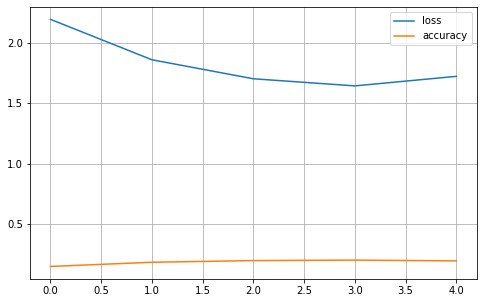

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
#plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
(x_test,y_test) = get_batch(10000)
model(x_test)
model.evaluate(x_test, y_test, verbose = 2)

313/313 - 6s - loss: 1.6273 - accuracy: 0.2002 - 6s/epoch - 18ms/step


[1.6273071765899658, 0.20020000636577606]

In [ ]:
print(np.apply_along_axis(target_func, 1, (x_test)))
model(x_test)

[[2]
 [0]
 [0]
 ...
 [5]
 [9]
 [1]]


<tf.Tensor: shape=(10000, 10), dtype=float32, numpy=
array([[2.0264119e-01, 3.5890995e-04, 2.1562599e-01, ..., 4.3704733e-04,
        2.0304678e-01, 3.5402979e-04],
       [2.0041221e-01, 3.9490810e-04, 2.2147849e-01, ..., 4.6128282e-04,
        2.0453760e-01, 3.4584451e-04],
       [2.0791976e-01, 2.9850107e-05, 2.0574324e-01, ..., 3.3836055e-05,
        2.1891940e-01, 2.8733080e-05],
       ...,
       [1.3502008e-04, 2.1091399e-01, 1.2243151e-04, ..., 1.6810265e-01,
        1.2204093e-04, 1.9488175e-01],
       [3.7329624e-04, 2.0797862e-01, 3.6862065e-04, ..., 1.9298995e-01,
        3.2569477e-04, 1.9255282e-01],
       [1.8724665e-04, 2.1172954e-01, 1.6717323e-04, ..., 1.6861340e-01,
        1.6700735e-04, 1.9465537e-01]], dtype=float32)>

# Do it again, Steve! with SELU

In [ ]:
from scipy.special import erfc

# alpha and scale to self normalize with mean 0 and standard deviation 1
# (see equation 14 in the paper):
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)

In [ ]:
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)
    
def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
num_layers = 100
layer_size = 140
training_size = 200000
val_size = 40000

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(30,)))

model.add(keras.layers.Dense(3 * layer_size, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(num_layers):
    model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [ ]:
(X_train,y_train) = get_batch(training_size)
(X_val, y_val) = get_batch(val_size)
(X_test, y_test) = get_batch(val_size)  

In [ ]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_val_scaled = (X_val - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs=50,
                    validation_data=(X_val_scaled, y_val))

Epoch 1/50
6250/6250 [==============================] - 117s 18ms/step - loss: 1.7603 - accuracy: 0.1850 - val_loss: 1.6186 - val_accuracy: 0.2027
Epoch 2/50
6250/6250 [==============================] - 113s 18ms/step - loss: 1.6172 - accuracy: 0.1994 - val_loss: 1.6207 - val_accuracy: 0.2037
Epoch 3/50
6250/6250 [==============================] - 109s 17ms/step - loss: 1.6157 - accuracy: 0.1996 - val_loss: 1.6181 - val_accuracy: 0.2006
Epoch 4/50
6250/6250 [==============================] - 113s 18ms/step - loss: 1.6155 - accuracy: 0.1981 - val_loss: 1.6131 - val_accuracy: 0.1965
Epoch 5/50
6250/6250 [==============================] - 109s 17ms/step - loss: 1.6151 - accuracy: 0.1998 - val_loss: 1.6159 - val_accuracy: 0.1989
Epoch 6/50
6250/6250 [==============================] - 109s 17ms/step - loss: 1.6145 - accuracy: 0.2000 - val_loss: 1.6153 - val_accuracy: 0.1985
Epoch 7/50
6250/6250 [==============================] - 109s 17ms/step - loss: 1.6141 - accuracy: 0.1988 - val_loss: 1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
#plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# Aaaand.... The same, but with one-cycle scheduling:

In [ ]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    init_weights = model.get_weights()
    iterations = math.ceil(len(X) / batch_size) * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    init_lr = K.get_value(model.optimizer.learning_rate)
    K.set_value(model.optimizer.learning_rate, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.learning_rate, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")

In [ ]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.learning_rate, rate)